In [16]:
#Импортируйте необходимые пакеты и классы:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn. metrics import mean_absolute_error
from sklearn. metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import tree

In [17]:
#	Осуществите описание Вашего набора данных. Загрузите Ваши данные и распечатайте первые 10 наблюдений.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names = [
'sepal_length',
'sepal_width',
'petal_length',
'petal_width',
'class'
])
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [18]:
# Подготовьте данные для работы. А именно: определите, есть ли в наборе данных пропущенные значения; если в данных присутствуют пропущенные значения, то либо удалите соответствующие наблюдения, либо рассчитайте их значение известным Вам методом; удалите выбросы, если они есть.
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [19]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
#Рассчитайте и выведите матрицу корреляции для Ваших данных. Укажите какой признак Вы берете за переменную отклика, а какие за факторы. Обоснуйте свое решение.
df.corr()

C:\Users\Timur\AppData\Local\Temp\ipykernel_11020\3281515206.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [21]:
df_out = df.corr().abs().stack().loc[lambda x: x.index.get_level_values(0) < x.index.get_level_values(1)]
df_out.index = df_out.index.map('_'.join)
df_out = df_out.to_frame().T
df_out.sort_values(by=0,axis=1,ascending=False)

C:\Users\Timur\AppData\Local\Temp\ipykernel_11020\2725926967.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_out = df.corr().abs().stack().loc[lambda x: x.index.get_level_values(0) < x.index.get_level_values(1)]


,petal_length_petal_width,petal_length_sepal_length,petal_width_sepal_length,petal_length_sepal_width,petal_width_sepal_width,sepal_length_sepal_width
0,0.962757,0.871754,0.817954,0.420516,0.356544,0.109369


Видно, что коррелируют больше всего petal_width-petal_length    petal_width-sepal_length    petal_length-sepal_length, так как по модулю они больше. Таким образром за фактор выберу petal_length, petal_width, sepal_length

In [22]:
df.loc[df['class'] == 'Iris-versicolor', df.columns == 'class'] = -1
df.loc[df['class'] == 'Iris-virginica', df.columns == 'class'] = 1
df.loc[df['class'] == 'Iris-setosa', df.columns == 'class'] = 0

# Сформируйте обучающую и тестовую выборки с помощью метода train_test_split из scikitlearn (например так:  train_test_split(X, y, test_size = 0.2, random_state=9).
#Отделите от Ваших данных прогнозное значение (переменную отклика), то есть удалите из Ваших данных столбец с прогнозными значениями.

X_train, X_test, y_train, y_test = train_test_split(df.drop(['sepal_width','class'],axis=1),df['class'], test_size = 0.2, random_state = 9)

In [23]:
print(X_train.shape, X_test.shape,y_test.shape)

(120, 3) (30, 3) (30,)


In [24]:
y_train = y_train.values.reshape(120,1)
y_test = y_test.values.reshape(30,1)
print(y_train.shape,y_test.shape)

(120, 1) (30, 1)


In [26]:
#Постройте натренированную модель дерева решений методом ⦁	DecisionTreeClassifier  .  Сделайте выводы из полученного результата.
tree1 = tree.DecisionTreeClassifier()
tree1.fit(X_train, y_train.astype('int'))
y_pred = tree1.predict(X_test)

[Text(0.5, 0.9166666666666666, 'X[1] <= 2.6\ngini = 0.666\nsamples = 120\nvalue = [41, 37, 42]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.5769230769230769, 0.75, 'X[2] <= 1.75\ngini = 0.5\nsamples = 83\nvalue = [41, 0, 42]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[1] <= 4.95\ngini = 0.198\nsamples = 45\nvalue = [40, 0, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[2] <= 1.65\ngini = 0.05\nsamples = 39\nvalue = [38, 0, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[2] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [2, 0, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini = 

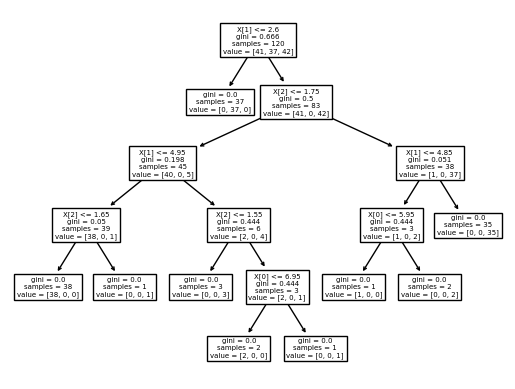

In [27]:
#	Исследуйте дерево решений; если позволяет размерность, постройте его график.
tree.plot_tree(tree1)

In [28]:
y_pred = y_pred.reshape(-1,1)
np.unique(y_pred)

array([-1,  0,  1])

In [29]:
classification_report(y_pred.astype('int'), y_test.astype('int'))

'              precision    recall  f1-score   support\n\n          -1       1.00      1.00      1.00         9\n           0       1.00      1.00      1.00        13\n           1       1.00      1.00      1.00         8\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [30]:
confusion_matrix(y_pred.astype('int'), y_test.astype('int'))

array([[ 9,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  8]], dtype=int64)

In [31]:
#Найдите средние абсолютную и квадратичную оценку ошибки модели и качество модели.
mean_absolute_error(y_pred,y_test)

0.0

In [32]:
mean_squared_error(y_pred,y_test)

0.0

In [33]:
accuracy_score(y_test.astype('int'),y_pred.astype('int'))

1.0

In [34]:
#Сравните теоретические и эмпирические значения переменной отклика на каких-нибудь двух значениях наблюдений из тестовой выборки. Сделайте вывод. 
y_pred[:3]

array([[ 1],
       [-1],
       [ 1]])

In [35]:
y_test[:3]

array([[1],
       [-1],
       [1]], dtype=object)